In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
veri=pd.read_csv("vw_golf_cars_v3_encoded.csv")
veri.drop("Unnamed: 0",axis=1,inplace=True)
X=veri.drop('price_try',axis=1)
y=veri['price_try']
veri.shape


(1603, 14)

In [ ]:
veri

,price_try,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed
0,940000,2017,120000,2,0,1,6,0,1,999,110,4.8,0,0
1,490000,2005,198000,0,0,1,11,0,1,1598,115,6.7,0,0
2,625000,2012,290000,0,1,1,16,1,1,1598,105,4.5,1,0
3,355000,2000,305000,0,3,1,2,1,1,1595,101,7.6,0,0
4,420000,2007,317000,2,0,1,9,1,1,1598,115,8.0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,395000,2001,237000,1,3,1,13,1,1,1595,102,8.0,10,2
1599,795000,2014,133000,2,0,1,2,1,1,1197,105,4.8,0,0
1600,1029000,2023,5000,0,0,1,2,1,1,999,110,4.4,0,0
1601,1412000,2022,50857,2,2,1,2,1,1,999,110,4.0,0,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1297, 13)
(1297,)
(161, 13)
(161,)


In [ ]:
mlp=Sequential()
mlp.add(Dense(128,input_dim=13,activation='relu'))
mlp.add(Dense(128,activation='relu'))
mlp.add(Dense(32,activation='relu'))
mlp.add(Dense(16,activation='relu'))
mlp.add(Dense(16,activation='relu'))
#mlp.add(Dropout(0.2))
mlp.add(Dense(1,activation='linear'))

mlp.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               1792      
                                                                 
 dense_55 (Dense)            (None, 128)               16512     
                                                                 
 dense_56 (Dense)            (None, 32)                4128      
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dense_58 (Dense)            (None, 16)                272       
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 23249 (90.82 KB)
Trainable params: 23249

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
mlp.compile(loss='mse',optimizer=opt,metrics='mean_absolute_error')

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
mlp.compile(loss='mse',optimizer=opt)

In [ ]:
history=mlp.fit(X_train,y_train,epochs=50, batch_size=20,validation_data=(X_val,y_val))


Epoch 1/50
65/65 [==============================] - 2s 6ms/step - loss: 318160338944.0000 - val_loss: 324007329792.0000
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 188416262144.0000 - val_loss: 59177725952.0000
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 56342921216.0000 - val_loss: 36231118848.0000
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 53065904128.0000 - val_loss: 33244205056.0000
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 53813342208.0000 - val_loss: 39268818944.0000
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 54666145792.0000 - val_loss: 33237923840.0000
Epoch 7/50
65/65 [==============================] - 0s 4ms/step - loss: 57772257280.0000 - val_loss: 35971072000.0000
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 64647000064.0000 - val_loss: 36212310016.0000
Epoch 9/50
65/65 [==============================] - 0

In [ ]:
#mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


In [ ]:
mlp.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 26341097472.0000


26341097472.0

dict_keys(['loss', 'val_loss'])


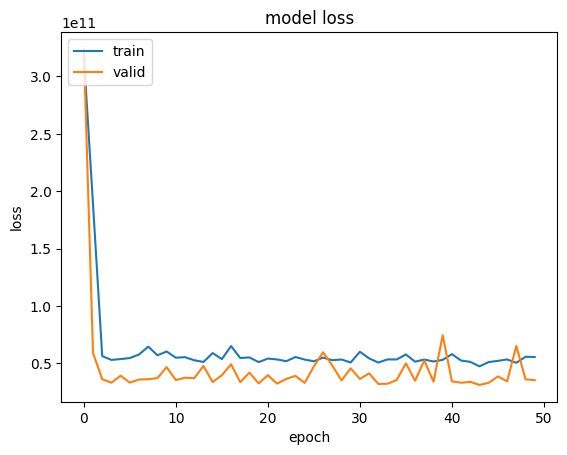

In [ ]:
import platform
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()




In [ ]:
from sklearn.metrics import r2_score

y_pred = mlp.predict(X_test)
R2 = r2_score(y_test,y_pred)
print("R2 Score=",R2 )

6/6 [==============================] - 0s 2ms/step
R2 Score= 0.8143790489338865


In [ ]:
print(y_pred)
print(y_test)

### **TEST**

In [ ]:

test_data = pd.read_csv('test_encoded.csv')
test_data.drop("Unnamed: 0",axis=1,inplace=True)
actual_price =test_data['price_try'].values
actual_price = np.array(actual_price, dtype=int)

new_test = test_data.drop('price_try', axis=1)
#test_price = np.array(new_test, dtype=int)

#scaler = StandardScaler()
#test = scaler.fit_transform(new_test.values)
#test_price = np.array(test, dtype=int)


In [ ]:
new_test.head()

,year,km,gear_type,fuel,body_type,color,from_,wheel_drive,engSize_cc,engPower_hp,avg_fuel_lt,painted,changed
0,2017,63000,1,0,0,0,1,0,1395,125,5.3,0,0
1,2016,94000,0,0,0,1,0,0,1395,125,5.2,0,0


In [ ]:
new_test.shape

(2, 13)

In [ ]:
pred_price = mlp.predict(new_test)
pred_price = np.array(pred_price, dtype=int)


1/1 [==============================] - 0s 23ms/step


In [ ]:
from sklearn.metrics import r2_score
R2_test = r2_score(actual_price,pred_price)
print("TEST R2 Score=",R2_test )

TEST R2 Score= 0.57090401375


In [ ]:
pred_price

array([[999930],
       [909252]])

In [ ]:
test_data['Prediction'] = pred_price
test_data[['Prediction','price_try']]


,Prediction,price_try
0,999930,1050000
1,909252,810000


In [ ]:
test_data['Error'] = ((test_data['price_try'] - test_data['Prediction'] ) /  test_data['price_try'])
test_data[['price_try', 'Prediction','Error']]

,price_try,Prediction,Error
0,1050000,999930,0.047686
1,810000,909252,-0.122533
